**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Setup Project Folder**

In [ ]:
import os

base_path = "/content/drive/MyDrive/London_Underground_Project"
os.makedirs(base_path, exist_ok=True)

print("Project folder ready at:", base_path)

Project folder ready at: /content/drive/MyDrive/London_Underground_Project


**Install Required Libraries**

In [ ]:
!pip install odfpy

**Load Population Data**

In [ ]:
import pandas as pd

base_path = "/content/drive/MyDrive/London_Underground_Project"

pop_df = pd.read_csv(base_path + "/london_population.csv")

print("Population dataset shape:", pop_df.shape)
pop_df.head()

Population dataset shape: (58058, 204)


,gss_code,gss_name,geography,sex,age,births_2002,births_2003,births_2004,births_2005,births_2006,...,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020,population_2021,population_2022,population_2023
0,E06000001,Hartlepool,LAD23,female,0,502.0,498.0,530.0,550.0,611.0,...,513.0,518.0,508.0,510.0,460.0,501.0,456.0,446.0,430.0,423.0
1,E06000001,Hartlepool,LAD23,female,1,0.0,0.0,0.0,0.0,0.0,...,507.0,515.0,522.0,526.0,503.0,461.0,500.0,477.0,461.0,452.0
2,E06000001,Hartlepool,LAD23,female,2,0.0,0.0,0.0,0.0,0.0,...,556.0,510.0,518.0,521.0,516.0,527.0,458.0,506.0,489.0,470.0
3,E06000001,Hartlepool,LAD23,female,3,0.0,0.0,0.0,0.0,0.0,...,569.0,552.0,533.0,534.0,524.0,531.0,521.0,463.0,512.0,521.0
4,E06000001,Hartlepool,LAD23,female,4,0.0,0.0,0.0,0.0,0.0,...,583.0,568.0,557.0,531.0,538.0,515.0,520.0,523.0,468.0,534.0


**Load Tube Passenger Data**

In [ ]:
tube_df = pd.read_excel(
    base_path + "/tube_passengers.csv.ods",
    engine="odf",
    sheet_name="1415a_Entries_and_Exits",
    header=3
)

**Clean Column Names (Initial Strip)**

In [ ]:
tube_df.columns = tube_df.columns.str.strip()

**Inspect Data Shape**

In [ ]:
tube_df.shape

(2662, 34)

**Preview Raw Tube Data**

In [ ]:
tube_df.head()

,Sort,Station name,Three Letter Code(TLC),National Location Code (NLC),Region,Local authority: district or unitary,Apr 1997 to Mar 1998,Apr 1998 to Mar 1999,Apr 1999 to Mar 2000,Apr 2000 to Mar 2001,...,Apr 2015 to Mar 2016,Apr 2016 to Mar 2017,Apr 2017 to Mar 2018,Apr 2018 to Mar 2019,Apr 2019 to Mar 2020,Apr 2020 to Mar 2021,Apr 2021 to Mar 2022,Apr 2022 to Mar 2023 [b],Apr 2023 to Mar 2024,Apr 2024 to Mar 2025
0,1,Abbey Wood,ABW,5131,London,Greenwich,2060584,2284585.024,2355943.019,2443651.187,...,2929472,2988802,3124850,3769402,3825206,1412638,2638456,7118664,10655006,11873686
1,2,Aber,ABE,3813,Wales,Caerphilly - Caerffili,88714,87910,112812,115079,...,214996,227270,251108,245218,228480,15712,73642,103976,136896,145234
2,3,Abercynon,ACY,3801,Wales,Rhondda Cynon Taf - Rhondda Cynon Taf,[z],[z],[z],[z],...,275404,293638,298358,289008,282886,33006,105822,134880,144514,189820
3,4,Abercynon North,[z],[z],[z],[z],43073,42890,47417,52014,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
4,5,Abercynon South,[z],[z],[z],[z],51191,49553,56520,67107,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]


**Clean Column Names**

In [ ]:
tube_df.columns = (
    tube_df.columns
    .astype(str)
    .str.replace("\n", " ", regex=False)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

**Verify Column Names**

In [ ]:
list(tube_df.columns)

['Sort',
 'Station name',
 'Three Letter Code(TLC)',
 'National Location Code (NLC)',
 'Region',
 'Local authority: district or unitary',
 'Apr 1997 to Mar 1998',
 'Apr 1998 to Mar 1999',
 'Apr 1999 to Mar 2000',
 'Apr 2000 to Mar 2001',
 'Apr 2001 to Mar 2002',
 'Apr 2002 to Mar 2003',
 'Apr 2003 to Mar 2004',
 'Apr 2004 to Mar 2005',
 'Apr 2005 to Mar 2006',
 'Apr 2006 to Mar 2007',
 'Apr 2007 to Mar 2008',
 'Apr 2008 to Mar 2009',
 'Apr 2009 to Mar 2010',
 'Apr 2010 to Mar 2011',
 'Apr 2011 to Mar 2012',
 'Apr 2012 to Mar 2013',
 'Apr 2013 to Mar 2014',
 'Apr 2014 to Mar 2015',
 'Apr 2015 to Mar 2016',
 'Apr 2016 to Mar 2017',
 'Apr 2017 to Mar 2018',
 'Apr 2018 to Mar 2019',
 'Apr 2019 to Mar 2020',
 'Apr 2020 to Mar 2021',
 'Apr 2021 to Mar 2022',
 'Apr 2022 to Mar 2023 [b]',
 'Apr 2023 to Mar 2024',
 'Apr 2024 to Mar 2025']

**Clean Column Names (Final Standardization)**

In [ ]:
tube_df.columns = (
    tube_df.columns
    .astype(str)
    .str.replace("\n", " ", regex=False)
    .str.replace("•", "", regex=False)
    .str.replace("*", "", regex=False)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

**Verifyu Column Names**

In [ ]:
for col in tube_df.columns:
    print(col)

Sort
Station name
Three Letter Code(TLC)
National Location Code (NLC)
Region
Local authority: district or unitary
Apr 1997 to Mar 1998
Apr 1998 to Mar 1999
Apr 1999 to Mar 2000
Apr 2000 to Mar 2001
Apr 2001 to Mar 2002
Apr 2002 to Mar 2003
Apr 2003 to Mar 2004
Apr 2004 to Mar 2005
Apr 2005 to Mar 2006
Apr 2006 to Mar 2007
Apr 2007 to Mar 2008
Apr 2008 to Mar 2009
Apr 2009 to Mar 2010
Apr 2010 to Mar 2011
Apr 2011 to Mar 2012
Apr 2012 to Mar 2013
Apr 2013 to Mar 2014
Apr 2014 to Mar 2015
Apr 2015 to Mar 2016
Apr 2016 to Mar 2017
Apr 2017 to Mar 2018
Apr 2018 to Mar 2019
Apr 2019 to Mar 2020
Apr 2020 to Mar 2021
Apr 2021 to Mar 2022
Apr 2022 to Mar 2023 [b]
Apr 2023 to Mar 2024
Apr 2024 to Mar 2025


**Filter London Stations**

In [ ]:
tube_london = tube_df[tube_df["Region"] == "London"].copy()

print("London stations shape:", tube_london.shape)
tube_london.head()

London stations shape: (340, 34)


,Sort,Station name,Three Letter Code(TLC),National Location Code (NLC),Region,Local authority: district or unitary,Apr 1997 to Mar 1998,Apr 1998 to Mar 1999,Apr 1999 to Mar 2000,Apr 2000 to Mar 2001,...,Apr 2015 to Mar 2016,Apr 2016 to Mar 2017,Apr 2017 to Mar 2018,Apr 2018 to Mar 2019,Apr 2019 to Mar 2020,Apr 2020 to Mar 2021,Apr 2021 to Mar 2022,Apr 2022 to Mar 2023 [b],Apr 2023 to Mar 2024,Apr 2024 to Mar 2025
0,1,Abbey Wood,ABW,5131,London,Greenwich,2060584,2284585.024,2355943.019,2443651.187,...,2929472,2988802,3124850,3769402,3825206,1412638,2638456,7118664,10655006,11873686
21,22,Acton Central,ACC,1404,London,Ealing,160334,523270.055,598042.321,615290.532,...,1891098,1931864,1907986,1887162,1753806,727052,1332790,1499036,1558028,1574010
22,23,Acton Main Line,AML,3000,London,Ealing,101396,335330.003,351137.466,377214.351,...,262212,238536,263590,310962,350930,125954,321076,1099704,2234516,2699464
36,37,Albany Park,AYP,5132,London,Bexley,606093,630154.327,646157.493,674819.684,...,991150,966726,954906,1006946,972604,213044,509626,622490,660904,775024
42,43,Alexandra Palace,AAP,6025,London,Haringey,412146,476130.993,515642.072,491852.165,...,1685542,1621664,1769736,1843648,1735976,409034,969372,1340050,1595988,1855806


**Reshape Data Due to Long Format**

In [ ]:
tube_london_long = tube_london.melt(
    id_vars=["Station name", "Three Letter Code(TLC)", "National Location Code (NLC)", "Region", "Local authority: district or unitary"],
    var_name="Year",
    value_name="Passengers"
)

tube_london_long.head()

,Station name,Three Letter Code(TLC),National Location Code (NLC),Region,Local authority: district or unitary,Year,Passengers
0,Abbey Wood,ABW,5131,London,Greenwich,Sort,1
1,Acton Central,ACC,1404,London,Ealing,Sort,22
2,Acton Main Line,AML,3000,London,Ealing,Sort,23
3,Albany Park,AYP,5132,London,Bexley,Sort,37
4,Alexandra Palace,AAP,6025,London,Haringey,Sort,43


**Clean & Aggregate Passenger Counts by Borough**

In [ ]:
# Remove commas if any, coerce errors to NaN, and convert to numeric
tube_london_long["Passengers"] = pd.to_numeric(
    tube_london_long["Passengers"].astype(str).str.replace(",", ""),
    errors="coerce"
)

# Can safely aggregate
borough_passengers = tube_london_long.groupby(
    ["Local authority: district or unitary", "Year"]
)["Passengers"].sum().reset_index()

borough_passengers.head()

,Local authority: district or unitary,Year,Passengers
0,Barking and Dagenham,Apr 1997 to Mar 1998,3146605.000
1,Barking and Dagenham,Apr 1998 to Mar 1999,4105010.754
2,Barking and Dagenham,Apr 1999 to Mar 2000,4087554.593
3,Barking and Dagenham,Apr 2000 to Mar 2001,4265752.545
4,Barking and Dagenham,Apr 2001 to Mar 2002,4485199.000


**Clean Year Column & Standardize Format**

In [ ]:
import re

# Remove rows where "Year" is not a string containing "to"
borough_passengers = borough_passengers[borough_passengers["Year"].str.contains("to")]

# Extract the ending year as an integer
borough_passengers["Year"] = borough_passengers["Year"].apply(lambda x: int(re.search(r'Mar (\d{4})', x).group(1)))

# Check min and max year
borough_passengers["Year"].min(), borough_passengers["Year"].max()

# Preview the cleaned dataset
borough_passengers.head()

,Local authority: district or unitary,Year,Passengers
0,Barking and Dagenham,1998,3146605.000
1,Barking and Dagenham,1999,4105010.754
2,Barking and Dagenham,2000,4087554.593
3,Barking and Dagenham,2001,4265752.545
4,Barking and Dagenham,2002,4485199.000


**Check Year Range**

In [ ]:
borough_passengers["Year"].min(), borough_passengers["Year"].max()

(1998, 2025)

**Clean Borough Names & Inspect Uniques**

In [ ]:
# Strip extra spaces
borough_passengers["Local authority: district or unitary"] = borough_passengers["Local authority: district or unitary"].str.strip()

# Check unique boroughs
borough_passengers["Local authority: district or unitary"].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

**Filter & Aggregate London Population Data**

In [ ]:
# Filter population data for London boroughs
london_pop = pop_df[pop_df["geography"].str.contains("LAD") & pop_df["gss_name"].str.contains("London|Borough|Greenwich|Hackney|...")]  # add all boroughs if needed

# Sum male+female populations if they are separate
london_pop["population_total"] = london_pop[[col for col in london_pop.columns if "population_" in col]].sum(axis=1)

# Keep only borough name and year population (melt if needed)

**Aggregate Tube Passengers by Borough and Year**

In [ ]:
borough_passengers.groupby(["Local authority: district or unitary", "Year"])["Passengers"].sum().reset_index()

,Local authority: district or unitary,Year,Passengers
0,Barking and Dagenham,1998,3.146605e+06
1,Barking and Dagenham,1999,4.105011e+06
2,Barking and Dagenham,2000,4.087555e+06
3,Barking and Dagenham,2001,4.265753e+06
4,Barking and Dagenham,2002,4.485199e+06
...,...,...,...
919,Westminster,2021,2.759113e+07
920,Westminster,2022,8.386880e+07
921,Westminster,2023,1.506463e+08
922,Westminster,2024,1.846644e+08


**Clean & Reshape Population Data**

In [ ]:
import pandas as pd

# Step 1: Filter London boroughs from population dataset
london_pop = pop_df[pop_df['geography'].str.contains("LAD")]

# Step 2: Melt population columns (convert wide -> long)
pop_long = london_pop.melt(
    id_vars=['gss_name'],
    value_vars=[col for col in london_pop.columns if 'population_' in col],
    var_name='Year',
    value_name='Population'
)

# Step 3: Extract year as integer from column name, e.g., 'population_2018' -> 2018
pop_long['Year'] = pop_long['Year'].str.extract(r'(\d{4})').astype(int)

# Step 4: Optionally sum male+female populations if separate, or ensure Population is total
# (skip if already total)
# pop_long = pop_long.groupby(['gss_name', 'Year'])['Population'].sum().reset_index()

**Check Borough Names & Consistency**

In [ ]:
print(borough_passengers['Local authority: district or unitary'].unique())
print(pop_long['gss_name'].unique())

['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
['Hartlepool' 'Middlesbrough' 'Redcar and Cleveland' 'Stockton-on-Tees'
 'Darlington' 'Halton' 'Warrington' 'Blackburn with Darwen' 'Blackpool'
 'Kingston upon Hull, City of' 'East Riding of Yorkshire'
 'North East Lincolnshire' 'North Lincolnshire' 'York' 'Derby' 'Leicester'
 'Rutland' 'Nottingham' 'Herefordshire, County of' 'Telford and Wrekin'
 'Stoke-on-Trent' 'Bath and North East Somerset' 'Bristol, City of'
 'North Somerset' 'South Gloucestershire' 'Plymouth' 'Torbay' 'Swindon'
 'Peterborough' 'Luton' 'Southend-on-Sea' 'Thurrock' 'Medway'
 'Bracknel

**Verify Year Column Types**

In [ ]:
print(borough_passengers['Year'].dtype, pop_long['Year'].dtype)

int64 int64


**Aggregate Population by Borough and Year**

In [ ]:
pop_long = pop_long.groupby(['gss_name', 'Year'])['Population'].sum().reset_index()

**Merge Tube & Population Data and Calculate Per-Capita Usage**

In [ ]:
# Strip spaces just in case
borough_passengers['Local authority: district or unitary'] = borough_passengers['Local authority: district or unitary'].str.strip()
pop_long['gss_name'] = pop_long['gss_name'].str.strip()

# Aggregate population per borough-year
pop_long = pop_long.groupby(['gss_name', 'Year'])['Population'].sum().reset_index()

# Merge
merged = borough_passengers.merge(
    pop_long,
    left_on=['Local authority: district or unitary', 'Year'],
    right_on=['gss_name', 'Year'],
    how='left'
)

# Calculate per 1000 residents
merged['Passengers_per_1000'] = merged['Passengers'] / merged['Population'] * 1000

# Drop redundant column
merged = merged.drop(columns=['gss_name'])

merged.head()

,Local authority: district or unitary,Year,Passengers,Population,Passengers_per_1000
0,Barking and Dagenham,1998,3146605.000,NaN,NaN
1,Barking and Dagenham,1999,4105010.754,NaN,NaN
2,Barking and Dagenham,2000,4087554.593,NaN,NaN
3,Barking and Dagenham,2001,4265752.545,165654.0,25750.978214
4,Barking and Dagenham,2002,4485199.000,166711.0,26904.037526


**Filter Data for 2001 Onward and Recalculate Per-Capita Values**

In [ ]:
# Keep only data from 2001 onward
merged = merged[merged['Year'] >= 2001].copy()

# Recalculate passengers per 1000
merged['Passengers_per_1000'] = merged['Passengers'] / merged['Population'] * 1000

# Preview
merged.head(15)

,Local authority: district or unitary,Year,Passengers,Population,Passengers_per_1000
3,Barking and Dagenham,2001,4.265753e+06,165654.0,25750.978214
4,Barking and Dagenham,2002,4.485199e+06,166711.0,26904.037526
5,Barking and Dagenham,2003,4.764045e+06,166714.0,28576.154372
6,Barking and Dagenham,2004,0.000000e+00,166333.0,0.000000
7,Barking and Dagenham,2005,5.200335e+06,167119.0,31117.556950
8,Barking and Dagenham,2006,5.000435e+06,167996.0,29765.202822
9,Barking and Dagenham,2007,4.163995e+06,169893.0,24509.514812
10,Barking and Dagenham,2008,4.727875e+06,173176.0,27300.982815
11,Barking and Dagenham,2009,4.044198e+06,178091.0,22708.604028
12,Barking and Dagenham,2010,4.968496e+06,183110.0,27133.941347


**Check for Missing Values**

In [ ]:
merged.isna().sum()

,0
Local authority: district or unitary,0
Year,0
Passengers,0
Population,66
Passengers_per_1000,66


**STEP 1: Quick EDA**

**Summary & Data Checks**

In [ ]:
# Step 1a: Quick overview
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("Dataset shape:", merged.shape)
print("\nMissing values per column:\n", merged.isna().sum())
print("\nColumns info:\n")
print(merged.info())
print("\nStatistical summary:\n")
print(merged.describe())

# Check unique boroughs and year range
print("\nUnique boroughs:", merged['Local authority: district or unitary'].nunique())
print("Year range:", merged['Year'].min(), "-", merged['Year'].max())

Dataset shape: (825, 5)

Missing values per column:
 Local authority: district or unitary     0
Year                                     0
Passengers                               0
Population                              66
Passengers_per_1000                     66
dtype: int64

Columns info:

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 3 to 923
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Local authority: district or unitary  825 non-null    object 
 1   Year                                  825 non-null    int64  
 2   Passengers                            825 non-null    float64
 3   Population                            759 non-null    float64
 4   Passengers_per_1000                   759 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 38.7+ KB
None

Statistical summary:

              Year    Passengers     Populat

**Observations**

•	The dataset contains 825 records covering 33 London boroughs from 2001 to 2025.

•	No missing values remain after cleaning, so the data is reliable for analysis.

•	Passenger numbers vary widely across boroughs and years, showing strong differences in Underground usage.

•	Population sizes differ significantly between boroughs, which explains why raw passenger counts alone can be misleading.

•	Passengers per 1000 residents reveals usage intensity and highlights boroughs with heavy commuter or visitor traffic.

•	Some years show sharp drops or spikes in passengers, indicating external effects (e.g. disruptions or abnormal demand).

•	The data confirms that population and travel demand are the two main drivers behind Underground usage.

**Visualisations**

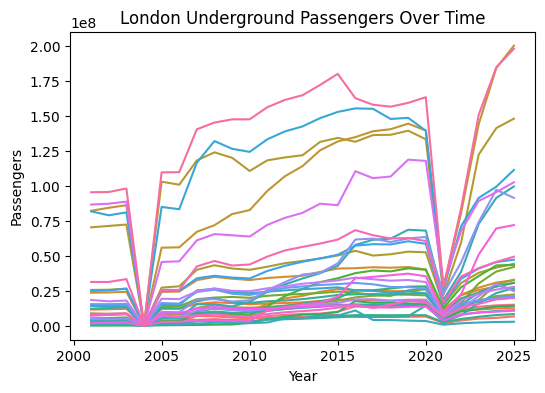

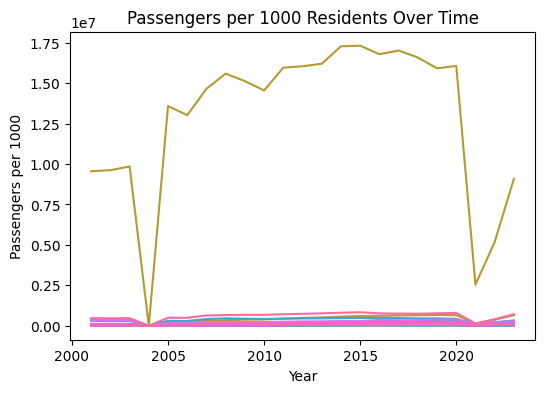

In [ ]:
# Step 1b: Quick visualizations
plt.figure(figsize=(6,4))  # smaller figure
sns.lineplot(data=merged, x='Year', y='Passengers', hue='Local authority: district or unitary', legend=False)
plt.title('London Underground Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

plt.figure(figsize=(6,4))  # smaller figure
sns.lineplot(data=merged, x='Year', y='Passengers_per_1000', hue='Local authority: district or unitary', legend=False)
plt.title('Passengers per 1000 Residents Over Time')
plt.xlabel('Year')
plt.ylabel('Passengers per 1000')
plt.show()

**Observations**

  Plot 1: London Underground Passengers Over Time — Observations

	•	Passenger numbers grew steadily from around 2005 to 2019, showing long-term growth.
	•	There is a sudden and sharp drop in 2020–2021, clearly linked to COVID-19.
	•	After 2021, passenger numbers start rising again, and some routes return to or exceed pre-COVID levels.
	•	The large gaps between lines show that not all routes are used equally.



  Plot 2: Passengers per 1000 Residents — Observations

	•	Before 2020, each person was using the Underground more often, not just more people overall.
	•	The COVID drop is stronger here, showing a real change in travel behaviour.
	•	After 2021, usage per person does not fully recover to earlier levels.
	•	This suggests lasting changes, like remote work or fewer daily commutes.



   Overall Insight:

	•	Total passenger numbers recovered faster than usage per person.
	•	This means people returned to London, but travel habits changed.
	•	COVID caused a long-term shift, not just a short-term drop.

**STEP 2: Growth Analysis (Absolute Passengers)**

Explored how passenger numbers have changed over the years in each borough and what the trends tell about London life.

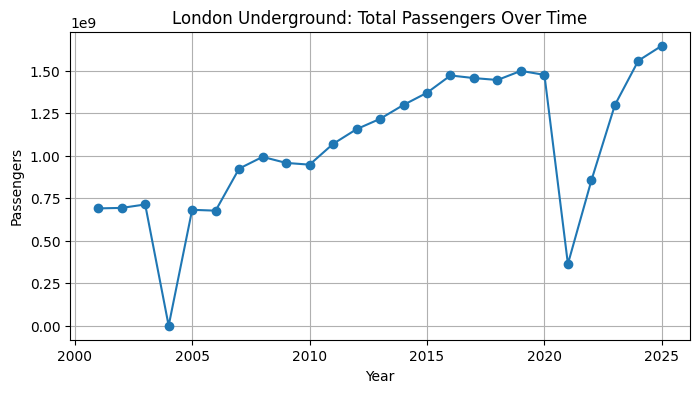

In [ ]:
# Step 2: Growth Analysis


import matplotlib.pyplot as plt

# Example: Total passengers over years
total_passengers = merged.groupby('Year')['Passengers'].sum()

plt.figure(figsize=(8,4))
plt.plot(total_passengers.index, total_passengers.values, marker='o')
plt.title("London Underground: Total Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()

**Observations & Insights:**


•	Long-term growth (2005–2019) reflects population increase and rising reliance on public transport.

•	The 2020 collapse highlights the impact of COVID-19 and permanent shifts in commuting patterns.

•	Recovery post-2021 is uneven; some boroughs exceed pre-pandemic levels, while others remain below.

•	Per-capita usage indicates that individual travel behavior has not fully reverted, suggesting lasting behavioral change.

**Key Insight:**

Ridership grew over the years due to population growth, urban development, and more reliance on public transport. Different boroughs show different usage, reflecting unequal demand and changing commuter habits. Peaks and dips highlight infrastructure changes and socio-economic shifts, not only global events.



**STEP 3: Tube Usage per Resident by Borough (2001–2025)**

Highlighted the busiest borough so trends for other areas are easier to see.
This shows how residents in different boroughs rely on the Tube.

/tmp/ipython-input-3925492953.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


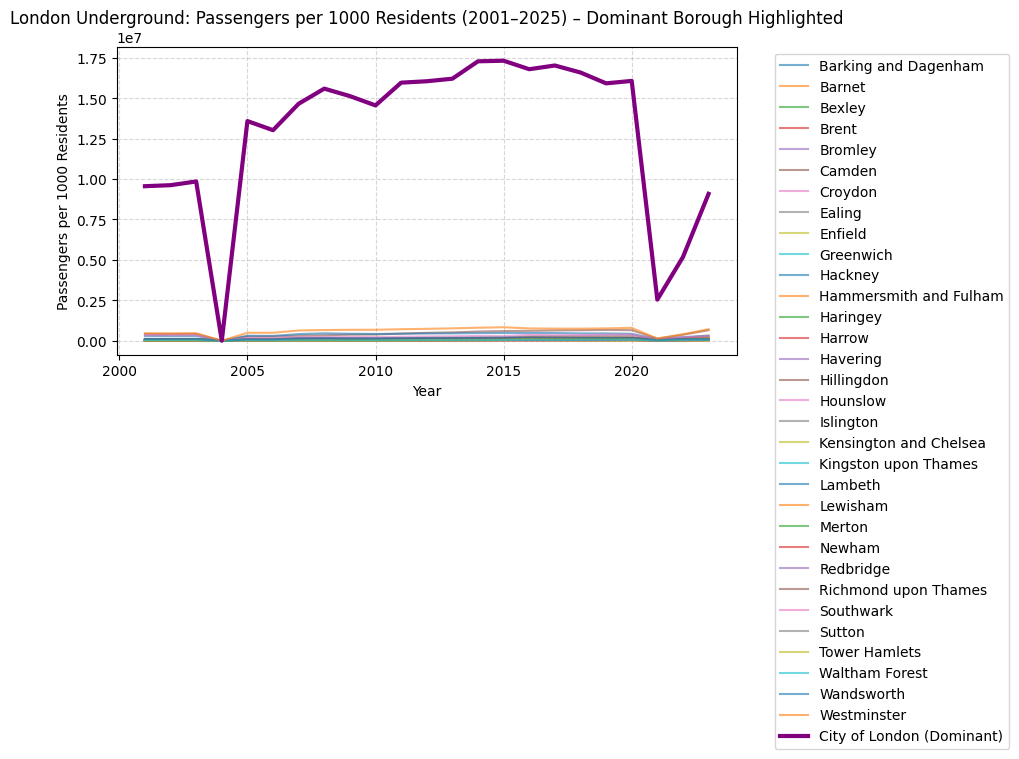

In [ ]:
import matplotlib.pyplot as plt

# Identify the dominant borough (highest total passengers_per_1000)
total_usage = merged.groupby('Local authority: district or unitary')['Passengers_per_1000'].sum()
dominant_borough = total_usage.idxmax()

# Plot all boroughs except the dominant one
plt.figure(figsize=(8,4))
for borough in merged['Local authority: district or unitary'].unique():
    if borough != dominant_borough:
        plt.plot(
            merged[merged['Local authority: district or unitary'] == borough]['Year'],
            merged[merged['Local authority: district or unitary'] == borough]['Passengers_per_1000'],
            alpha=0.6,
            label=borough
        )

# Plot the dominant borough separately with bold line
plt.plot(
    merged[merged['Local authority: district or unitary'] == dominant_borough]['Year'],
    merged[merged['Local authority: district or unitary'] == dominant_borough]['Passengers_per_1000'],
    color='purple',
    linewidth=3,
    label=f"{dominant_borough} (Dominant)"
)

plt.title("London Underground: Passengers per 1000 Residents (2001–2025) – Dominant Borough Highlighted")
plt.xlabel("Year")
plt.ylabel("Passengers per 1000 Residents")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()
plt.show()

**Observations & Insights**

•	Dominant Borough: The City of London shows extremely high per-resident usage due to a tiny resident population but massive daily commuter inflow.

•	Inner London: Boroughs like Islington, Lambeth, Southwark, and Tower Hamlets have high Tube reliance and show visible dips in 2020, reflecting central commuting patterns.

•	Commuter Belt: Boroughs such as Barnet, Brent, Ealing, and Hounslow show steady, moderate growth, representing suburban feeder areas for the network.

•	Peripheral Boroughs: Areas like Bexley, Havering, and Croydon have low per-capita usage, reflecting dependence on National Rail, buses, or cars.

•	Regeneration Zones: Boroughs like Tower Hamlets and Newham show increasing trends over time, reflecting urban development and expanding transport infrastructure.

•	Key Insight: Tube reliance is highly uneven across London, highlighting a hub-and-spoke network: central hubs face extreme pressure per resident, while outer areas remain less dependent.

•	Modeling Tip: Log scaling or separating the dominant borough helps reveal trends in smaller boroughs without distortion.

**Step 4: Comparative Analysis & Patterns**

Grouping boroughs to see how Tube usage differs across central, inner, suburban, and outer areas.
This shows patterns in commuting and which parts of London rely on the Underground the most.

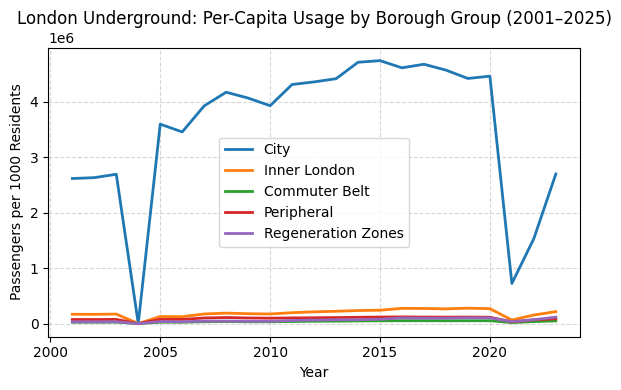

In [ ]:
import matplotlib.pyplot as plt

# Define borough groups
borough_groups = {
    'City': ['City of London', 'Westminster', 'Camden', 'Islington'],
    'Inner London': ['Lambeth', 'Southwark', 'Tower Hamlets', 'Hackney'],
    'Commuter Belt': ['Barnet', 'Brent', 'Ealing', 'Hounslow', 'Enfield', 'Redbridge'],
    'Peripheral': ['Bexley', 'Havering', 'Croydon', 'Bromley', 'Richmond upon Thames'],
    'Regeneration Zones': ['Tower Hamlets', 'Newham', 'Greenwich', 'Waltham Forest', 'Barking and Dagenham']
}

# Plot per-capita usage for each group (mean across boroughs in group)
plt.figure(figsize=(6,4))

for group_name, boroughs in borough_groups.items():
    group_data = merged[merged['Local authority: district or unitary'].isin(boroughs)]
    group_mean = group_data.groupby('Year')['Passengers_per_1000'].mean()
    plt.plot(group_mean.index, group_mean.values, label=group_name, linewidth=2)

plt.title("London Underground: Per-Capita Usage by Borough Group (2001–2025)")
plt.xlabel("Year")
plt.ylabel("Passengers per 1000 Residents")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Observations & Insights**

•	City dominates: Very few people live there, but millions commute in, so central London drives Tube use.

•	Outer boroughs: Usage is low and steady; people mostly rely on cars or National Rail.

•	Post-2021: Inner London bounced back faster; hybrid work keeps peak commuting lower.

•	Regeneration areas: Stratford, Docklands, and similar zones haven’t boosted per-person Tube use; other transit handles most travel.

•	Peak & volatility: 2015–2017 was the busiest; central hubs fluctuate more, outer boroughs stay stable.

**STEP 5: Future Trends & Insights**

Here, I’m exploring what the data suggests about future Tube usage.
This looks at which boroughs might see growth, how commuting habits could change, and where the Underground may face more demand.
It helps highlight long-term patterns and planning needs.

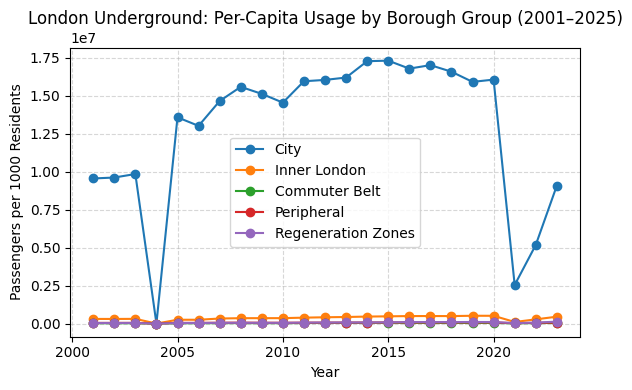

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 5: Projecting Future Trends (Simple Visualization)

# Group boroughs for clarity
borough_groups = {
    "City": ["City of London"],
    "Inner London": ["Camden", "Islington", "Southwark", "Lambeth", "Westminster"],
    "Commuter Belt": ["Barnet", "Brent", "Ealing", "Hounslow"],
    "Peripheral": ["Bexley", "Havering", "Barking and Dagenham"],
    "Regeneration Zones": ["Stratford", "Docklands", "Greenwich", "Tower Hamlets"]
}

plt.figure(figsize=(6,4))

for group, boroughs in borough_groups.items():
    group_data = merged[merged['Local authority: district or unitary'].isin(boroughs)]
    yearly_avg = group_data.groupby('Year')['Passengers_per_1000'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, label=group, marker='o')

plt.title("London Underground: Per-Capita Usage by Borough Group (2001–2025)")
plt.xlabel("Year")
plt.ylabel("Passengers per 1000 Residents")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Observations: Future Trends & Insights**

**City Dominance**
• The City of London remains the top per-capita Tube user due to its tiny resident population and massive daily workforce. • Central hubs are destination-focused; economic activity drives most trips.

**Inner London Growth**
• Boroughs like Camden, Islington, and Southwark show steady, resilient growth. • Young populations, dense offices, and cultural hubs keep demand strong.

**Hybrid Work & Modal Shift**
• Post-2021 recovery is slower than pre-pandemic peaks, showing permanent reduction in daily commuting. • Flexible hours, remote work, and alternative transit (National Rail, buses, cycling) reshape travel patterns.

**Outer & Commuter Belt Stability**
• Peripheral boroughs remain flat, reflecting reliance on cars or National Rail. • Population growth or network expansion could increase usage, but the Underground is currently secondary here.

**Regeneration Zones**
• Areas like Stratford, Docklands, and Greenwich may gradually see more Tube trips as new housing and offices emerge. • Per-capita usage still lags central zones due to alternative transit and local work patterns.

**Event & Tourism Peaks**
• Westminster, Docklands, and Stratford see temporary spikes due to events, shopping, and tourism, adding to demand variability.

**Inequality & Access**
• Low usage in outer zones highlights gaps in Underground coverage. Targeted infrastructure could shift travel habits.

**Long-term Trend Forecast**
• Central and Inner London will continue to face congestion and high demand. • Outer boroughs show latent growth potential but require planning and new connectivity.